### Задание

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

#### 1. Получите и загрузите данные.

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [3]:
categorical_features = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
raw_data.drop(categorical_features, axis=1, inplace=True)
raw_data.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [4]:
raw_data.dropna(inplace=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   Fare      714 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [5]:
X = raw_data.iloc[:, 1:]
y = raw_data['Survived']

In [6]:
model = LinearRegression()

In [7]:
model.fit(X, y)

LinearRegression()

In [8]:
y_pred = model.predict(X) # получаем предсказанное значение

In [9]:
r2_raw = r2_score(y, y_pred)

print('Raw data R2:', r2_raw)

Raw data R2: 0.09396026849333983


#### 3. Снова загрузите полные данные.

In [10]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Удалим признак "Cabin" т.к. он заполнен лишь у ~23% пассажиров
data.drop('Cabin', axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
# Вероятнее всего, порт посадки не повлияет на выживание пассажира
data.drop('Embarked', axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [14]:
# Лишними также, на мой взгляд, являются признаки: "PassengerId", "Name", "Ticket", "Fare"
unnecessary_features = ['PassengerId', 'Name', 'Ticket', 'Fare']
data.drop(unnecessary_features, axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#### 5. Проверьте данные на наличие пропущенных значений.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


##### a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [16]:
(data.isna().mean() * 100).round(2)
# Видим, что почти 20% данных будут утеряны

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
dtype: float64

##### b) Заполните пропуски.

In [17]:
# Заполним пропуски в признаке "Age" средним значением для групп по полу и классу пассажира
fill_data = data.copy()

In [18]:
fill_data['Age'] = fill_data['Age'].fillna(data.groupby(['Sex', 'Pclass'])['Age'].transform('median'))
fill_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


#### 6. Категориальные переменные переведите в цифровые значения.

In [19]:
le = LabelEncoder()

In [20]:
le.fit(fill_data['Sex'])

LabelEncoder()

In [21]:
fill_data['Sex'] = le.transform(fill_data['Sex'])

In [22]:
fill_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [23]:
numeric_fill_data = pd.get_dummies(fill_data, columns=['Pclass'])

In [24]:
numeric_fill_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,0,1
1,1,0,38.0,1,0,1,0,0
2,1,0,26.0,0,0,0,0,1
3,1,0,35.0,1,0,1,0,0
4,0,1,35.0,0,0,0,0,1


#### 7. Проверьте данные на наличие выбросов.

In [25]:
numeric_fill_data.describe()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.647587,29.112424,0.523008,0.381594,0.242424,0.206510,0.551066
std,0.486592,0.477990,13.304424,1.102743,0.806057,0.428790,0.405028,0.497665
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,21.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,36.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000


In [26]:
# Явных выбросов по признаку "Age" не вижу: 7 младенцев до 1 года, 5 пассажиров старше 70 лет (одному из которых 80)
numeric_fill_data['Age'][(numeric_fill_data['Age'] < 1) | (numeric_fill_data['Age'] > 70)].sort_values()

803     0.42
755     0.67
469     0.75
644     0.75
78      0.83
831     0.83
305     0.92
116    70.50
96     71.00
493    71.00
851    74.00
630    80.00
Name: Age, dtype: float64

In [27]:
# 18 семей численностью от 5 человек также, на мой взгляд, выбросами не являются
numeric_fill_data['SibSp'][(numeric_fill_data['SibSp'] > 4)].count() + \
    numeric_fill_data['Parch'][(numeric_fill_data['Parch'] > 4)].count()

18

#### 8. Постройте 1-2 графика на выбор. 

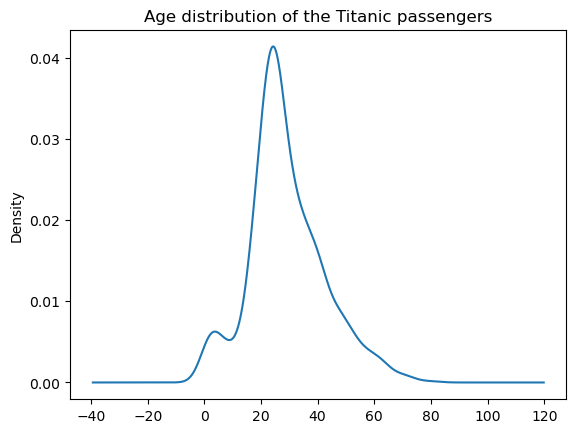

In [28]:
numeric_fill_data['Age'].plot(kind='density')
plt.title('Age distribution of the Titanic passengers')
plt.show()

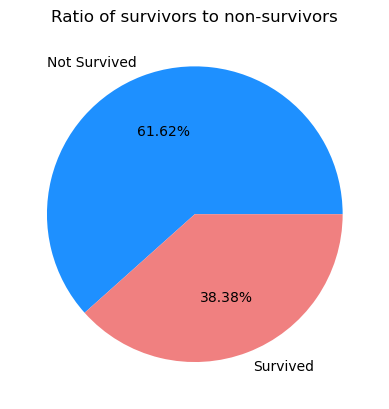

In [29]:
plt.pie(numeric_fill_data['Survived'].value_counts(), autopct='%1.2f%%', 
        labels=['Not Survived', 'Survived'], colors=['dodgerblue', 'lightcoral'])
plt.title('Ratio of survivors to non-survivors')
plt.show()

#### 9. Попробуйте математически преобразовать признак Age.

In [30]:
numeric_fill_data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [31]:
# Выполним преобразование признака "Age" с помощью логарифмирования
numeric_fill_data['Age'] = np.log(numeric_fill_data['Age'])

In [32]:
numeric_fill_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,3.091042,1,0,0,0,1
1,1,0,3.637586,1,0,1,0,0
2,1,0,3.258097,0,0,0,0,1
3,1,0,3.555348,1,0,1,0,0
4,0,1,3.555348,0,0,0,0,1


#### 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [33]:
X = numeric_fill_data.iloc[:, 1:]
y = numeric_fill_data['Survived']

In [34]:
model.fit(X, y)

LinearRegression()

In [35]:
y_pred = model.predict(X)

In [36]:
r2_reviewed = r2_score(y, y_pred)

print('Reviewed data R2:', r2_reviewed)

Reviewed data R2: 0.4091348605544908


In [37]:
# Сравним результаты для коэффициента R2 до обработки данных и после
print('R2 before data processing: ', r2_raw)
print('R2 after data processing: ', r2_reviewed)
print(f'As a result of data processing, R2 increased by a factor of {np.round(r2_reviewed/r2_raw, 2)}.')

R2 before data processing:  0.09396026849333983
R2 after data processing:  0.4091348605544908
As a result of data processing, R2 increased by a factor of 4.35.


#### 11. Сформулируйте выводы по проделанной работе.

Работа с данными при построении моделей машинного обучения является важной и целесообразной. Преобразования и обработка данных помогают улучшить качество модели и позволяют извлечь более точные выводы и прогнозы.